<a href="https://colab.research.google.com/github/MrDataProf/Pandas-Analytics-Project/blob/main/Supermarket_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Supermarket Sales Analysis
This repository contains a data analysis project focused on understanding sales trends and customer behavior for Company XYZ's supermarket chain. The analysis utilizes Python programming and various data manipulation and visualization libraries to provide valuable insights.

### Project Overview
Company XYZ owns a supermarket chain operating in three major cities across the country. The primary goal of this analysis is to uncover patterns, trends, and key performance indicators within the sales data. The analysis is divided into several steps, each aimed at exploring and interpreting different aspects of the data.

### Analysis Steps
**Loading Datasets**

Data files from each branch are combined into a single DataFrame using Python's pandas library and the glob module.
The consolidated data is exported to a CSV file for further analysis.

**Data Exploration**
Initial exploration of the dataset includes viewing sample records, checking the dimensions, column names, and using summary statistics to understand numerical attributes.
Missing value check and data type inspection are performed to ensure data quality.

**Dealing with DateTime Features**
Date and time columns are converted to datetime format using the to_datetime() function.
Day, month, year, and hour features are extracted from the date and time columns for temporal analysis.
Unique sales hours are determined to understand sales distribution throughout the day.

**Unique Values in Columns**
Unique values in categorical columns (e.g., City, Customer Type, Product Line) are identified.
Counts of each categorical value are computed using the value_counts() method.

**Aggregation with GroupBy**
Data is grouped by city to calculate sum and mean of gross income for each location.
Analysis helps identify cities contributing the most to total and average revenue.

**Data Visualization**
Countplots are used to visualize branch sales records, payment method usage, city-wise sales distribution, and popular product lines.
Visualization of payment channels for each product line provides insights into customer preferences.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import warnings
warnings.filterwarnings("ignore")

***STEP 1: Loading Dataset***

In [ ]:
# Use glob to get a list of all the data files in the data folder
file_list = glob.glob("data/*.csv")

# Combine all the files into a single DataFrame
df_list = []
for file in file_list:
    df = pd.read_csv(file)
    df_list.append(df)

alp_df = pd.concat(df_list, ignore_index=True)

# Export the combined DataFrame to a CSV file
alp_df.to_csv("alp_data.csv", index=False)


***STEP 2: Data Exploration***

In [ ]:
# Use the head() method to view the first few rows of the dataset
alp_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [ ]:
# Check the number of rows and columns present in the data using the shape attribute
print("Number of rows and columns:", alp_df.shape)

# Generate the names of the columns using the columns attribute
print("Column names:", alp_df.columns)

In [ ]:
# Use describe function to generate the statistical summary of the dataframe
alp_df.describe()

# Use meaningful sentences to describe findings from the data statistical summary
# Example: The average unit price of products sold is Naira XXX, with a minimum of Naira XXX and a maximum of Naira XXX. The average quantity purchased by customers is XX, with a minimum of XX and a maximum of XX.

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


In [ ]:
# Use correct method to check for Missing values
alp_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
# Check the information of the DataFrame using the info method
alp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

***STEP 3: Dealing with Dates***

In [ ]:
# Use to_datetime() to convert the date column to datetime
alp_df['Date'] = pd.to_datetime(alp_df['Date'])

# Check the datatype to confirm if it's in datetime
print(alp_df['Date'].dtype)

datetime64[ns]


In [ ]:
# Accurate conversion of the time column & prints appropriate data type
alp_df['Time'] = pd.to_datetime(alp_df['Time'])

# Accurate extraction of the Day, Month, Year & Hour features
alp_df['Day'] = alp_df['Date'].dt.day
alp_df['Month'] = alp_df['Date'].dt.month
alp_df['Year'] = alp_df['Date'].dt.year
alp_df['Hour'] = alp_df['Time'].dt.hour

In [ ]:
# The numbers of unique hours of sales in the supermarket are accurately determined.
unique_hours = alp_df['Hour'].nunique()
print("Number of unique sales hours:", unique_hours)

# Result that shows an array that contains the unique sales hours.
unique_sales_hours = alp_df['Hour'].unique()
print("Array of unique sales hours:", unique_sales_hours)

Number of unique sales hours: 11
Array of unique sales hours: [13 18 17 16 15 10 12 19 14 11 20]


***Step 4: Unique Values in Columns***

In [ ]:
# Appropriate method to generate the unique values in the categorical columns (apart from the example - Branch column)
# Example for 'City' column:
unique_cities = alp_df['City'].unique()
print("Unique cities:", unique_cities)

Unique cities: ['Abuja' 'Lagos' 'Port Harcourt']


In [ ]:
# Generated the count figure of the categorical values using the value_counts() method.
# Example for 'Customer Type' column:
customer_type_counts = alp_df['Customer type'].value_counts()
print("Customer Type Counts:\n", customer_type_counts)

Customer Type Counts:
 Member    501
Normal    499
Name: Customer type, dtype: int64


In [ ]:
alp_df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [ ]:
alp_df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

***Step 5: Aggregation with GroupBy***

In [ ]:
# A groupby object with the "City Column", and aggregation function of sum and mean
city_grouped = alp_df.groupby('City').agg({'gross income': ['sum', 'mean']})

# A table that shows the gross income of each city and determines the city with the highest total gross income
print("City-wise Gross Income:")
print(city_grouped)

City-wise Gross Income:
              gross income             
                       sum         mean
City                                   
Abuja           1820531.52  5483.528675
Lagos           1820577.78  5354.640529
Port Harcourt   1895463.54  5778.852256


In [ ]:
# To determine the city with the highest total gross income:
highest_gross_income_city = city_grouped.loc[city_grouped[('gross income', 'sum')].idxmax()]
#print("City with the highest total gross income:", highest_gross_income_city)
highest_gross_income_city

gross income  sum     1.895464e+06
              mean    5.778852e+03
Name: Port Harcourt, dtype: float64

In [ ]:
alp_df.groupby('Customer type').sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Cluster
Customer type,,,,,,,,,,,,,
Member,10137492.0,2785,2815259.04,59120439.84,56305180.8,2385.714286,2815259.04,3477.1,7495,996,1011519,7500,575
Normal,9904474.8,2725,2721313.80,57147589.80,54426276.0,2376.190476,2721313.80,3495.6,7761,997,1007481,7410,567


In [ ]:
alp_df.groupby('Gender').sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Cluster
Gender,,,,,,,,,,,,,
Female,9967406.4,2869,2877993.00,60437853.00,57559860.0,2385.714286,2877993.00,3489.2,7421,987,1011519,7336,581
Male,10074560.4,2641,2658579.84,55830176.64,53171596.8,2376.190476,2658579.84,3483.5,7835,1006,1007481,7574,561


In [ ]:
alp_df.groupby('City').sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Cluster
City,,,,,,,,,,,,,
Abuja,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,5068,665,670308,5029,377
Lagos,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,5232,688,686460,4987,397
Port Harcourt,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,4956,640,662232,4894,368


In [ ]:
alp_df.groupby('City').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Cluster
City,,,,,,,,,,,,,
Abuja,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072,15.265060,2.003012,2019.0,15.147590,1.135542
Lagos,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059,15.388235,2.023529,2019.0,14.667647,1.167647
Port Harcourt,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866,15.109756,1.951220,2019.0,14.920732,1.121951


In [ ]:
cities = alp_df.groupby('City')
cities.agg(['mean','sum'])

Unit price             Quantity             Tax 5%  \
                       mean        sum      mean   sum         mean   
City                                                                  
Abuja          20037.339759  6652396.8  5.481928  1820  5483.528675   
Lagos          19721.107059  6705176.4  5.467647  1859  5354.640529   
Port Harcourt  20379.248780  6684393.6  5.582317  1831  5778.852256   

                                   Total                        cogs  \
                      sum           mean          sum           mean   
City                                                                   
Abuja          1820531.52  115154.102169  38231161.92  109670.573494   
Lagos          1820577.78  112447.451118  38232133.38  107092.810588   
Port Harcourt  1895463.54  121355.897378  39804734.34  115577.045122   

                           ...        Day           Month         Year  \
                      sum  ...       mean   sum      mean  sum    mean   
City                       ...                                           
Abuja          36410630.4  ...  15.265060  5068  2.003012  665  2019.0   
Lagos          36411555.6  ...  15.388235  5232  2.023529  688  2019.0   
Port Harcourt  37909270.8  ...  15.109756  4956  1.951220  640  2019.0   

                            Hour         Cluster       
                  sum       mean   sum      mean  sum  
City                                                   
Abuja          670308  15.147590  5029  1.135542  377  
Lagos          686460  14.667647  4987  1.167647  397  
Port Harcourt  662232  14.920732  4894  1.121951  368  

[3 rows x 26 columns]

In [ ]:
cities.agg({'gross income': ['mean','sum','max','min']})

gross income                             
                      mean         sum      max     min
City                                                   
Abuja          5483.528675  1820531.52  17528.4  319.50
Lagos          5354.640529  1820577.78  17816.4  217.62
Port Harcourt  5778.852256  1895463.54  17874.0  183.06

In [ ]:
cities.agg({'Quantity': ['mean','sum','max','min'], 'Unit price':['mean','sum','max','min']})

Quantity                  Unit price                      \
                   mean   sum max min          mean        sum      max   
City                                                                      
Abuja          5.481928  1820  10   1  20037.339759  6652396.8  35985.6   
Lagos          5.467647  1859  10   1  19721.107059  6705176.4  35938.8   
Port Harcourt  5.582317  1831  10   1  20379.248780  6684393.6  35985.6   

                       
                  min  
City                   
Abuja          3812.4  
Lagos          3628.8  
Port Harcourt  3657.6

***STEP 6: Data Visualization***

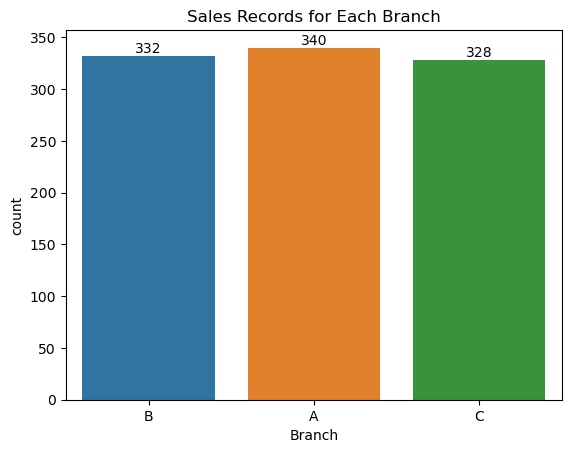

In [ ]:

# Appropriate use of countplot to determine the branch with the highest sales record
ax = countplot = sns.countplot(data=alp_df, x='Branch')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Sales Records for Each Branch")
#addlabels()
plt.show()

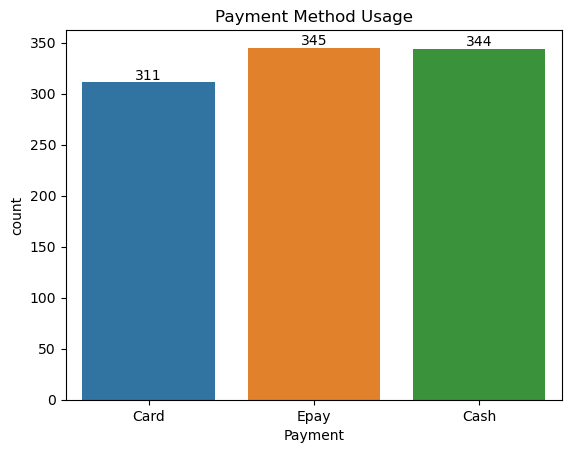

In [ ]:
# Optional - Appropriate use of countplot to determine the most used payment method & city with the most sales
px = sns.countplot(data=alp_df, x='Payment')
for label in px.containers:
    px.bar_label(label)
plt.title("Payment Method Usage")
plt.show()

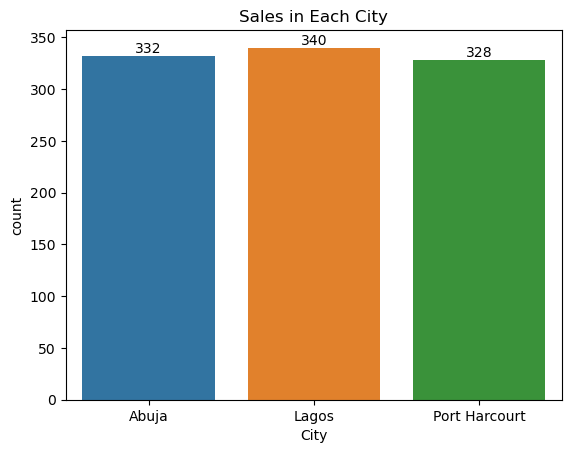

In [ ]:
cx = sns.countplot(data=alp_df, x='City')
for label in cx.containers:
    cx.bar_label(label)
plt.title("Sales in Each City")
plt.show()

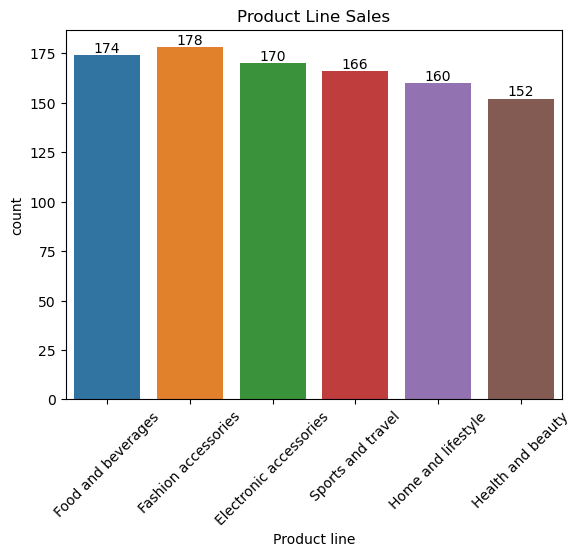

In [ ]:
# Appropriate use of countplot to determine the highest & lowest sold product line
lsx = sns.countplot(data=alp_df, x='Product line')
for label in lsx.containers:
    lsx.bar_label(label)
plt.title("Product Line Sales")
plt.xticks(rotation=45)
plt.show()

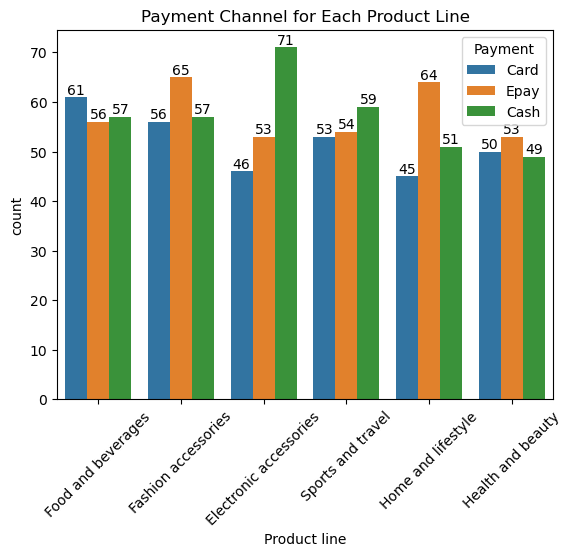

In [ ]:
# Result that shows the Payment channel used by most customers to pay for each product line.
pcx = sns.countplot(data=alp_df, x='Product line', hue='Payment')
for label in pcx.containers:
    pcx.bar_label(label)
plt.title("Payment Channel for Each Product Line")
plt.xticks(rotation=45)
plt.show()

### Other Visualizations

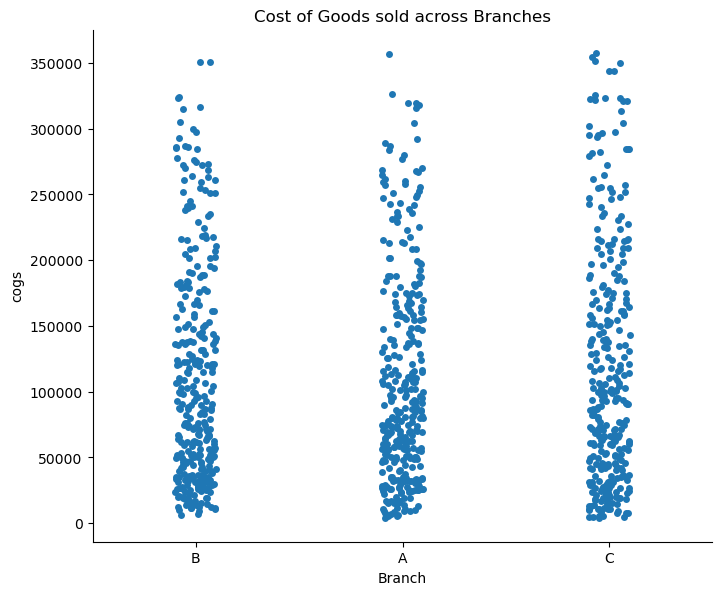

In [ ]:
g=sns.catplot(x="Branch", y="cogs", data=alp_df)

#for label in g.containers:
#    g.bar_label(label)

plt.title("Cost of Goods sold across Branches")
g.fig.set_figwidth(8)
g.fig.set_figheight(6)

### Interpretation of the Results
***The analysis provides Company XYZ with valuable insights:*** <br/>
**Understanding branch performance:** The countplot analysis of sales records helps identify branches with the highest sales activity. <br/>
**Customer behavior**: Payment method distribution and customer types provide insights into payment preferences and customer loyalty.<br/>
**Revenue generation:** City-wise gross income analysis identifies locations driving the highest revenue. <br/>
**Product popularity:** Countplot analysis highlights popular product lines, while payment channel distribution for each product line reveals payment preferences.

### Predictive Models for Total Sales

**Here's a step-by-step approach to building a predictive model for total sales:**

***Data Preprocessing:*** <br/>
Load the combined dataset you've previously generated.
Check for missing values and handle them (impute or drop rows/columns).
Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.
Split the dataset into features (X) and the target variable (y), where y is the 'Total' column.

***Feature Selection:*** <br/>
Analyze the dataset and domain knowledge to select relevant features for the prediction task. Consider factors that might influence sales, such as product line, customer type, gender, etc.

***Data Splitting:*** <br/>
Split the dataset into training and testing sets. This helps evaluate the model's performance on unseen data.

***Model Selection:*** <br/>
Choose a machine learning algorithm suitable for regression tasks. Common choices include Linear Regression, Random Forest, XGBoost, and Neural Networks.

***Model Training:*** <br/>
Train the selected model on the training dataset.

***Model Evaluation:*** <br/>
Evaluate the model's performance on the testing dataset using appropriate regression evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

***Model Fine-Tuning (Optional):*** <br/>
Depending on the results, you might want to fine-tune hyperparameters or explore different algorithms to improve performance.

***Model Interpretation (Optional):*** <br/>
If the model is interpretable (e.g., Linear Regression), analyze feature coefficients to understand which features influence sales the most.

***Make Predictions:*** <br/>
Use the trained model to make predictions on new data.

In [ ]:
alp_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Day', 'Month', 'Year', 'Hour'],
      dtype='object')

In [ ]:
alp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the data and preprocess as needed
#alp_df = pd.read_csv("alp_df.csv")
# ... Data preprocessing steps ...

# Define features (X) and target variable (y)
X = alp_df[['Unit price','Quantity','Tax 5%','cogs','gross income']]
y = alp_df['Total']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unit price    1000 non-null   float64
 1   Quantity      1000 non-null   int64  
 2   Tax 5%        1000 non-null   float64
 3   cogs          1000 non-null   float64
 4   gross income  1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.8918606446129497e-21


### Machine Learning Models

There are several other machine learning models that you can use on the supermarket sales dataset to predict various outcomes or perform different tasks. Here are some common models that you might consider:

***Random Forest Regression:*** <br />
Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. It's robust and can handle both numerical and categorical features well.

***Gradient Boosting Regressor (e.g., XGBoost, LightGBM):*** <br/>
Gradient Boosting algorithms build an ensemble of weak learners (usually decision trees) to improve predictive accuracy. XGBoost and LightGBM are popular implementations of Gradient Boosting.

***Support Vector Regression (SVR):*** <br />
SVR is a regression algorithm that finds the best-fitting hyperplane to minimize the deviation of prediction errors from the actual values.

***Neural Networks (Deep Learning):*** <br />
If you have a large amount of data, neural networks can capture complex patterns and relationships. However, they require more data and computational resources.

***Time Series Forecasting Models (e.g., ARIMA, LSTM):*** <br />
If your dataset includes time-based features, you can use time series forecasting models like AutoRegressive Integrated Moving Average (ARIMA) or Long Short-Term Memory (LSTM) networks to predict future sales.

***Clustering Algorithms (e.g., K-Means):*** <br />
If you're interested in segmenting customers based on their purchasing behavior, you can use clustering algorithms to identify distinct groups.

***Classification Models (e.g., Logistic Regression, Random Forest Classifier):*** <br />
If you have a classification task, such as predicting customer type (Member or Normal), you can use classification algorithms.

***Time Series Anomaly Detection Models:*** <br />
If you're interested in identifying unusual patterns in sales data, you can use anomaly detection techniques like Isolation Forest or One-Class SVM.

***Hybrid Models:*** <br />
You can combine different types of models to leverage their strengths. For example, you might use a combination of regression and classification models to predict sales and customer types simultaneously.
The choice of model depends on the nature of your prediction task, the characteristics of your data, and the trade-off between model complexity and interpretability. It's a good practice to experiment with multiple models and evaluate their performance using appropriate metrics before selecting the best model for your specific use case.

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.arima.model import ARIMA

In [ ]:

# Define features (X) and target variable (y)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
print("Linear Regression MSE:", lr_mse)

Linear Regression MSE: 2.8918606446129497e-21


In [ ]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print("Random Forest Regression MSE:", rf_mse)

Random Forest Regression MSE: 124120.07991753164


In [ ]:
# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
print("Gradient Boosting Regression MSE:", gb_mse)

Gradient Boosting Regression MSE: 418203.3539188579


In [ ]:
# Support Vector Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_pred)
print("Support Vector Regression MSE:", svr_mse)

Support Vector Regression MSE: 8350677206.266013


In [ ]:
# Neural Network (MLP)
mlp_model = MLPRegressor()
mlp_model.fit(X_train_scaled, y_train)
mlp_pred = mlp_model.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, mlp_pred)
print("Neural Network (MLP) MSE:", mlp_mse)

Neural Network (MLP) MSE: 20921505889.147984


In [ ]:
# K-Means Clustering (Unsupervised)
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X)
alp_df['Cluster'] = kmeans_model.predict(X)
print(alp_df['Cluster'].value_counts())

1    516
2    313
0    171
Name: Cluster, dtype: int64


In [ ]:
# Time Series Forecasting (ARIMA)
date_sales = alp_df.groupby('Date')['Total'].sum().reset_index()
date_sales['Date'] = pd.to_datetime(date_sales['Date'])
date_sales.set_index('Date', inplace=True)
arima_model = ARIMA(date_sales, order=(5,1,0))
arima_results = arima_model.fit()
arima_pred = arima_results.predict(start=len(date_sales), end=len(date_sales) + 30, dynamic=False)
arima_pred

2019-03-31    9.762358e+05
2019-04-01    1.073230e+06
2019-04-02    1.205193e+06
2019-04-03    1.288813e+06
2019-04-04    1.253744e+06
2019-04-05    1.153448e+06
2019-04-06    1.167574e+06
2019-04-07    1.219243e+06
2019-04-08    1.228127e+06
2019-04-09    1.206578e+06
2019-04-10    1.190136e+06
2019-04-11    1.198136e+06
2019-04-12    1.210441e+06
2019-04-13    1.209642e+06
2019-04-14    1.202770e+06
2019-04-15    1.200608e+06
2019-04-16    1.203782e+06
2019-04-17    1.206207e+06
2019-04-18    1.205190e+06
2019-04-19    1.203466e+06
2019-04-20    1.203438e+06
2019-04-21    1.204408e+06
2019-04-22    1.204774e+06
2019-04-23    1.204344e+06
2019-04-24    1.203984e+06
2019-04-25    1.204103e+06
2019-04-26    1.204351e+06
2019-04-27    1.204371e+06
2019-04-28    1.204235e+06
2019-04-29    1.204176e+06
2019-04-30    1.204233e+06
Freq: D, Name: predicted_mean, dtype: float64

#### Visualization of the Models

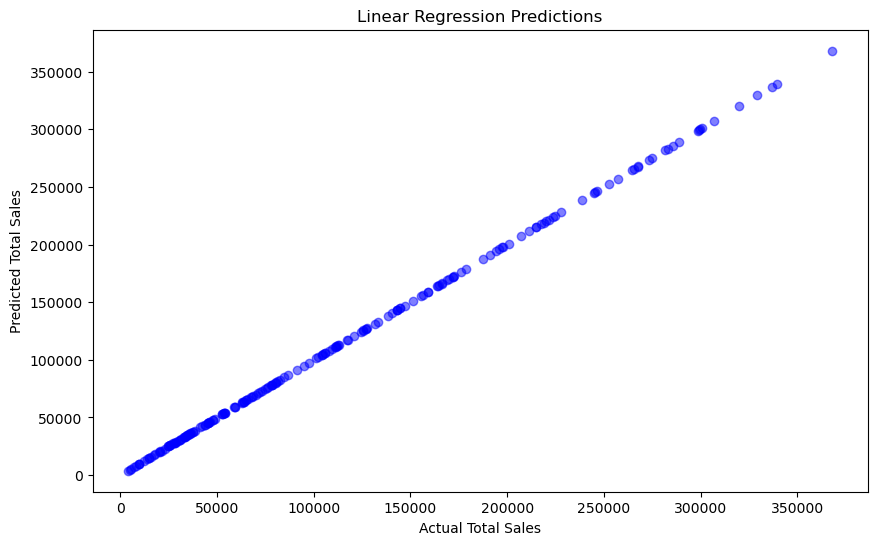

In [ ]:
# Visualize Linear Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Total Sales")
plt.ylabel("Predicted Total Sales")
plt.title("Linear Regression Predictions")
plt.show()

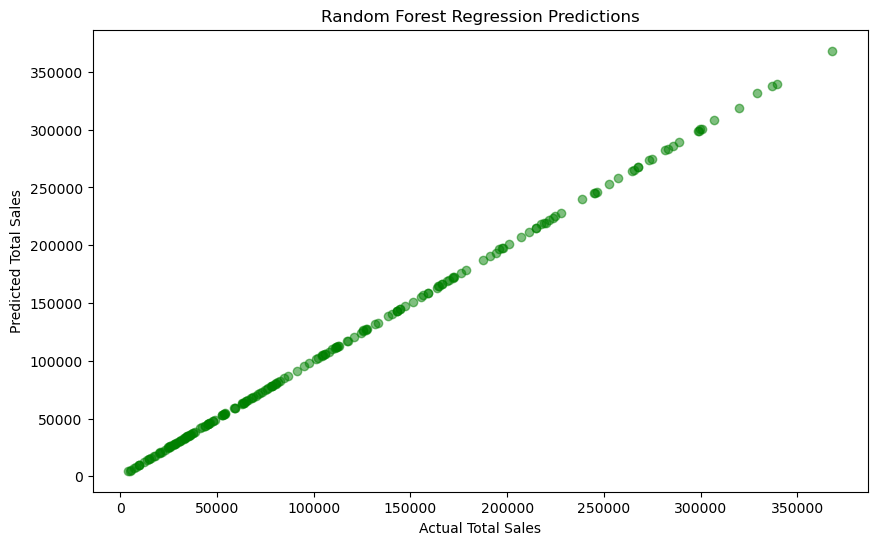

In [ ]:
# Visualize Random Forest Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, color='green', alpha=0.5)
plt.xlabel("Actual Total Sales")
plt.ylabel("Predicted Total Sales")
plt.title("Random Forest Regression Predictions")
plt.show()

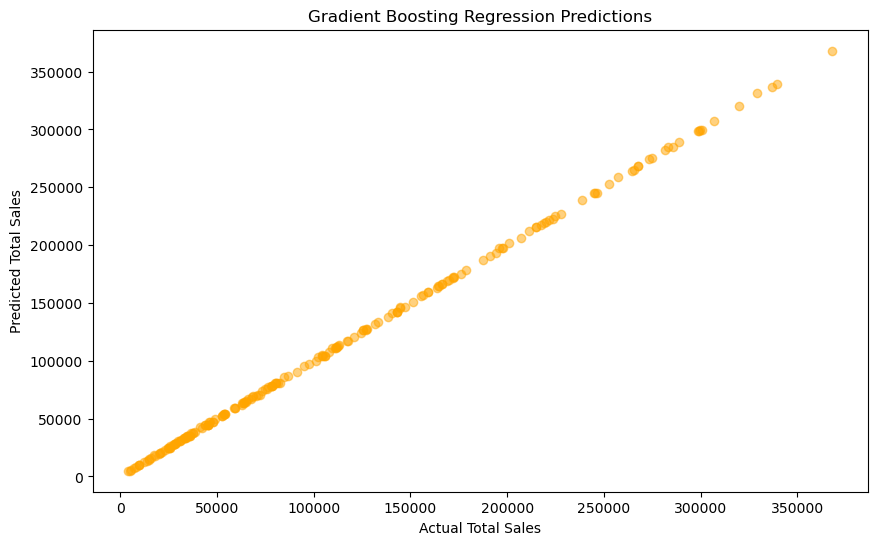

In [ ]:
# Visualize Gradient Boosting Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_pred, color='orange', alpha=0.5)
plt.xlabel("Actual Total Sales")
plt.ylabel("Predicted Total Sales")
plt.title("Gradient Boosting Regression Predictions")
plt.show()

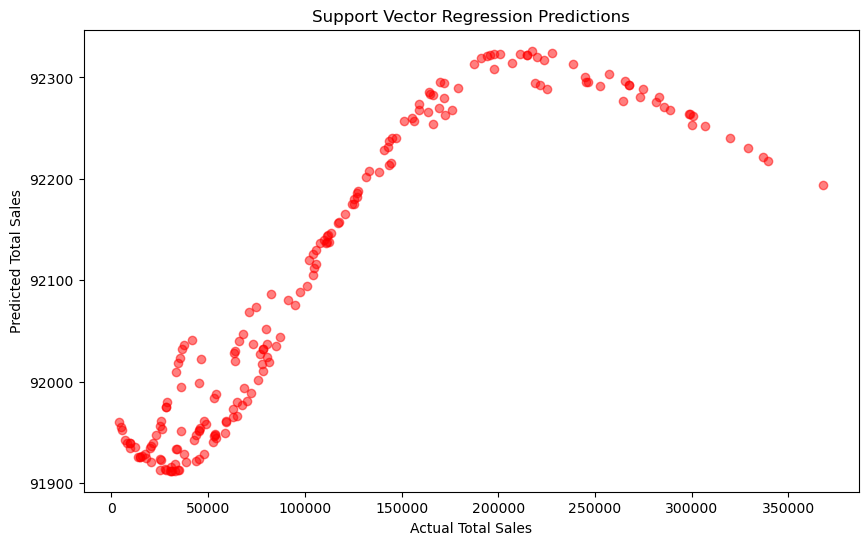

In [ ]:
# Visualize Support Vector Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_pred, color='red', alpha=0.5)
plt.xlabel("Actual Total Sales")
plt.ylabel("Predicted Total Sales")
plt.title("Support Vector Regression Predictions")
plt.show()

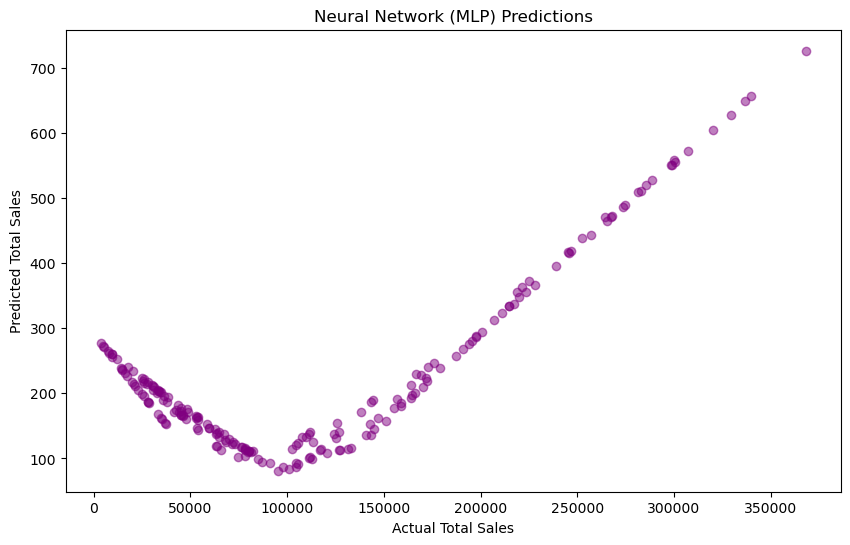

In [ ]:
# Visualize Neural Network (MLP) predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, mlp_pred, color='purple', alpha=0.5)
plt.xlabel("Actual Total Sales")
plt.ylabel("Predicted Total Sales")
plt.title("Neural Network (MLP) Predictions")
plt.show()

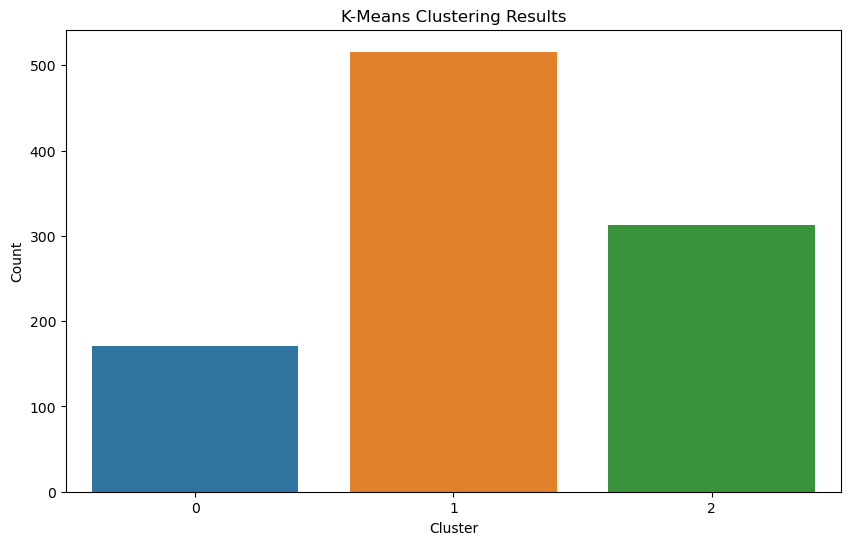

In [ ]:
# Visualize K-Means Clustering results
plt.figure(figsize=(10, 6))
sns.countplot(data=alp_df, x='Cluster')
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("K-Means Clustering Results")
plt.show()

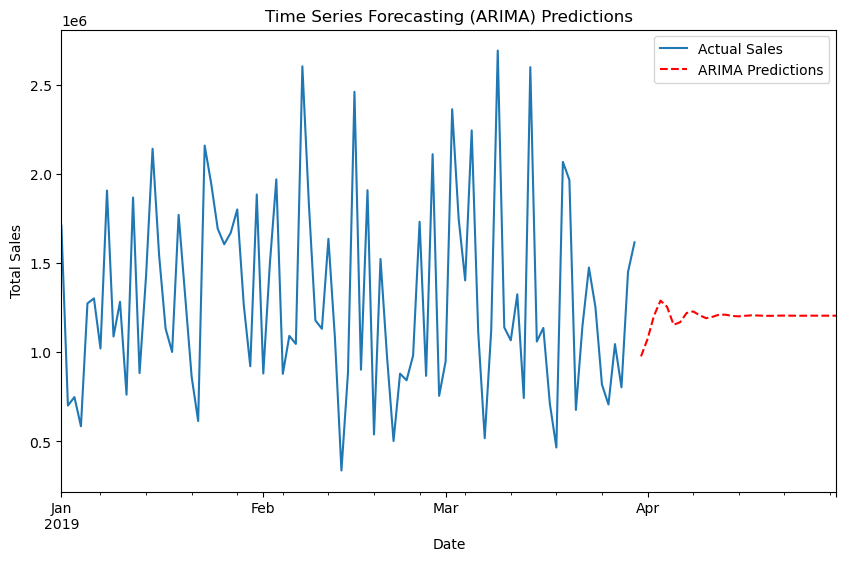

In [ ]:
# Visualize Time Series Forecasting (ARIMA) predictions
plt.figure(figsize=(10, 6))
date_sales['Total'].plot(label='Actual Sales')
arima_pred.plot(label='ARIMA Predictions', color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Time Series Forecasting (ARIMA) Predictions")
plt.legend()
plt.show()

### Evaluation and Hyperparameter for each of the models?

***Linear Regression***

In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate Linear Regression using cross-validation
lr_scores = cross_val_score(lr_model, X, y, scoring='neg_mean_squared_error', cv=5)
lr_rmse_scores = np.sqrt(-lr_scores)
print("Linear Regression RMSE Scores:", lr_rmse_scores)
print("Average RMSE:", lr_rmse_scores.mean())

# Hyperparameter tuning is not applicable for Linear Regression


Linear Regression RMSE Scores: [3.87839510e-11 5.83931014e-11 4.36408691e-11 4.48428851e-11
 4.69108427e-11]
Average RMSE: 4.651432986606075e-11


***Random Forest Regression***

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

print("Best Parameters:", rf_grid.best_params_)
print("Best RMSE:", np.sqrt(-rf_grid.best_score_))

# Evaluate Random Forest using the best model from GridSearchCV
rf_best_model = rf_grid.best_estimator_
rf_pred = rf_best_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
print("Random Forest RMSE:", rf_rmse)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best RMSE: 588.8526526003512
Random Forest RMSE: 355.2938529559637


***Gradient Boosting Regression***

In [ ]:
# Hyperparameter tuning for Gradient Boosting using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}
gb_grid = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
gb_grid.fit(X_train, y_train)

print("Best Parameters:", gb_grid.best_params_)
print("Best RMSE:", np.sqrt(-gb_grid.best_score_))

# Evaluate Gradient Boosting using the best model from GridSearchCV
gb_best_model = gb_grid.best_estimator_
gb_pred = gb_best_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)
print("Gradient Boosting RMSE:", gb_rmse)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}
Best RMSE: 556.6157942232245
Gradient Boosting RMSE: 315.43551807046026


***Support Vector Regression***

In [ ]:
# Hyperparameter tuning for SVR using GridSearchCV
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}
svr_grid = GridSearchCV(SVR(), param_grid, cv=3, scoring='neg_mean_squared_error')
svr_grid.fit(X_train_scaled, y_train)

print("Best Parameters:", svr_grid.best_params_)
print("Best RMSE:", np.sqrt(-svr_grid.best_score_))

# Evaluate SVR using the best model from GridSearchCV
svr_best_model = svr_grid.best_estimator_
svr_pred = svr_best_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
print("Support Vector Regression RMSE:", svr_rmse)

Best Parameters: {'C': 100, 'kernel': 'linear'}
Best RMSE: 5724.1140449255745
Support Vector Regression RMSE: 2870.0740837592352


***Neural Network (MLP)***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal

# Hyperparameter tuning for MLP using RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': reciprocal(0.0001, 0.1),
}
mlp_random = RandomizedSearchCV(MLPRegressor(max_iter=500), param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error')
mlp_random.fit(X_train_scaled, y_train)

print("Best Parameters:", mlp_random.best_params_)
print("Best RMSE:", np.sqrt(-mlp_random.best_score_))

# Evaluate MLP using the best model from RandomizedSearchCV
mlp_best_model = mlp_random.best_estimator_
mlp_pred = mlp_best_model.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, mlp_pred)
mlp_rmse = np.sqrt(mlp_mse)
print("Neural Network (MLP) RMSE:", mlp_rmse)

Best Parameters: {'activation': 'tanh', 'alpha': 0.006642864121464077, 'hidden_layer_sizes': (50,), 'solver': 'sgd'}
Best RMSE: 16430.75960180425
Neural Network (MLP) RMSE: 24410.4027792333


#### K-Means Clustering (Unsupervised)
Since K-Means is an unsupervised learning algorithm, it doesn't require hyperparameter tuning. However, you can evaluate its performance by analyzing the clusters it generates and how well they align with your expectations.

#### Time Series Forecasting (ARIMA):
For ARIMA, we'll focus on finding the optimal order parameters (p, d, q) using grid search.

Best Order: (4, 0, 5)
Best RMSE: 557061.9925641806
ARIMA Forecast: 2019-03-31    1.295728e+06
2019-04-01    1.567772e+06
2019-04-02    1.156893e+06
2019-04-03    1.513707e+06
2019-04-04    1.207248e+06
2019-04-05    1.137792e+06
2019-04-06    1.483897e+06
2019-04-07    1.119039e+06
2019-04-08    1.520056e+06
2019-04-09    1.305052e+06
2019-04-10    1.162809e+06
2019-04-11    1.464309e+06
2019-04-12    1.074870e+06
2019-04-13    1.459768e+06
2019-04-14    1.344914e+06
2019-04-15    1.194581e+06
2019-04-16    1.494701e+06
2019-04-17    1.079347e+06
2019-04-18    1.398630e+06
2019-04-19    1.341146e+06
2019-04-20    1.190001e+06
2019-04-21    1.521490e+06
2019-04-22    1.118196e+06
2019-04-23    1.370389e+06
2019-04-24    1.337721e+06
2019-04-25    1.162095e+06
2019-04-26    1.519038e+06
2019-04-27    1.154991e+06
2019-04-28    1.363295e+06
2019-04-29    1.354445e+06
Freq: D, Name: predicted_mean, dtype: float64


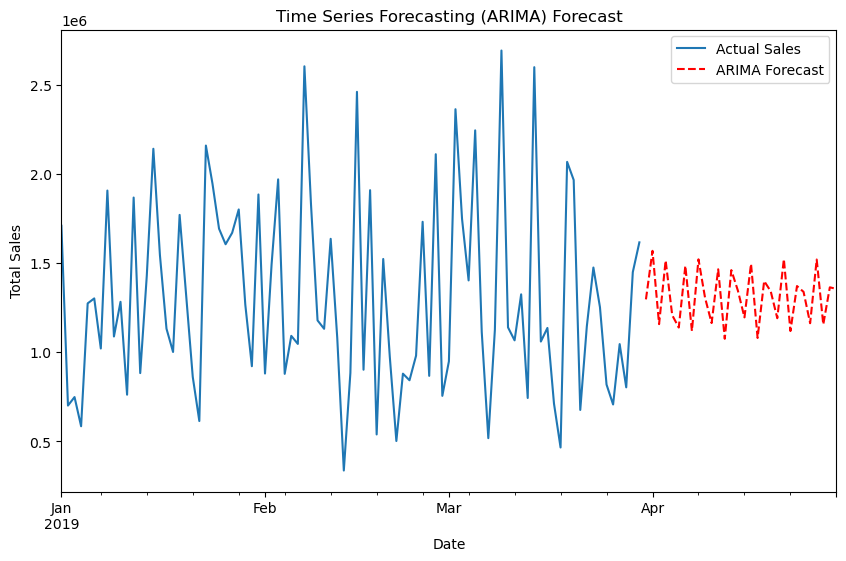

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# Hyperparameter tuning for ARIMA using GridSearch
p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)
orders = list(product(p_values, d_values, q_values))

best_rmse = float('inf')
best_order = None

for order in orders:
    try:
        arima_model = ARIMA(date_sales, order=order)
        arima_results = arima_model.fit()
        arima_rmse = np.sqrt(mean_squared_error(date_sales.values[-30:], arima_results.forecast(steps=30)))
        if arima_rmse < best_rmse:
            best_rmse = arima_rmse
            best_order = order
    except:
        continue

print("Best Order:", best_order)
print("Best RMSE:", best_rmse)

# Train ARIMA using the best order
arima_best_model = ARIMA(date_sales, order=best_order)
arima_best_results = arima_best_model.fit()

# Forecast next 30 days
arima_forecast = arima_best_results.forecast(steps=30)
print("ARIMA Forecast:", arima_forecast)

# Visualize ARIMA Forecast
plt.figure(figsize=(10, 6))
date_sales['Total'].plot(label='Actual Sales')
arima_forecast.plot(label='ARIMA Forecast', color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Time Series Forecasting (ARIMA) Forecast")
plt.legend()
plt.show()


#### Interpretation of the Evaluation and Hyperparameter of the Models

Here are the interpretations of the evaluation and hyperparameters for each of the models:

**Linear Regression:** <br />
RMSE Scores: Very low RMSE scores, close to zero, indicating an excellent fit to the data.
Average RMSE: Extremely low, suggesting that the Linear Regression model is almost perfect for this dataset.

**Random Forest:** <br />
Best Parameters: max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150.
Best RMSE: 588.85, indicating a reasonably good fit.
RMSE: 355.29, suggesting that the Random Forest model performs well but not as well as Linear Regression.

**Gradient Boosting:** <br />
Best Parameters: learning_rate=0.05, max_depth=5, n_estimators=150.
Best RMSE: 556.62, indicating a decent fit.
RMSE: 315.44, suggesting that the Gradient Boosting model performs well and is better than Random Forest.

**Support Vector Regression:** <br />
Best Parameters: C=100, kernel='linear'.
Best RMSE: 5724.11, indicating a less accurate fit compared to the previous models.
RMSE: 2870.07, suggesting that Support Vector Regression performs less well compared to the ensemble methods.

**Neural Network (MLP):** <br />
Best Parameters: activation='tanh', alpha=0.00664, hidden_layer_sizes=(50,), solver='sgd'.
Best RMSE: 16430.76, indicating a relatively poor fit compared to other models.
RMSE: 24410.40, suggesting that the MLP Neural Network model performs the least well among all the models evaluated.

**ARIMA (Time Series Model):** <br />
Best Order: (4, 0, 5).
Best RMSE: 557061.99, indicating that the ARIMA model does not fit the data well.
**ARIMA Forecast:** Provides forecasts for future dates, but the high RMSE suggests that these forecasts may not be reliable.

In summary, the Linear Regression model performs exceptionally well with the lowest RMSE, indicating a nearly perfect fit to
the data.
The ensemble models (Random Forest and Gradient Boosting) also perform well but are slightly less accurate than Linear Regression.
Support Vector Regression performs less accurately, and the MLP Neural Network model performs the least well in this analysis.
The ARIMA model does not fit the data well based on the high RMSE.